In [1]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding & Exploration

In [2]:
# Obtain the first 10 rows of the netflix stock prices dataset
df = pd.read_csv('C:\\Rohan\\SharpestMinds - Projects\\Project 4\\NFLX.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [3]:
# Obtain the last 10 rows of the netflix stock prices dataset
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [4]:
# Obtain all the columns of this dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

By looking at the dataframe, there are 7 variables involved in the Netflix's stock raw dataset.

Variables:

Date: Everyday Netflix stock price

Open: Price at which Netflix stock is opened

High: The highest price at which Netflix stock traded during the trading day

Low: The lowest price at which Netflix stock trades over a trading day

Close: The last price at which Netflix stock trades during a trading day

Adj Close: The closing price of Netflix stock after paying off dividends and/or capital gain distributions

Volume: Volume of stock traded during a trading day

In [5]:
# Obtain the dimensions of this dataset
df.shape

(1009, 7)

We can observe that this dataset has about 1009 rows and 7 attributes.

In [6]:
# Obtain the data types for each of the attributes
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
# Convert the attribute "date" to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
# Obtain more info for each of these attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


## Data Cleaning

In [9]:
# Obtain the total number of missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Obtain the total number of duplicate records
duplicate_rows = df.duplicated()
total_duplicates = duplicate_rows.sum()
total_duplicates

0

C:\Users\User\AppData\Local\Temp\ipykernel_1564\3366742402.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


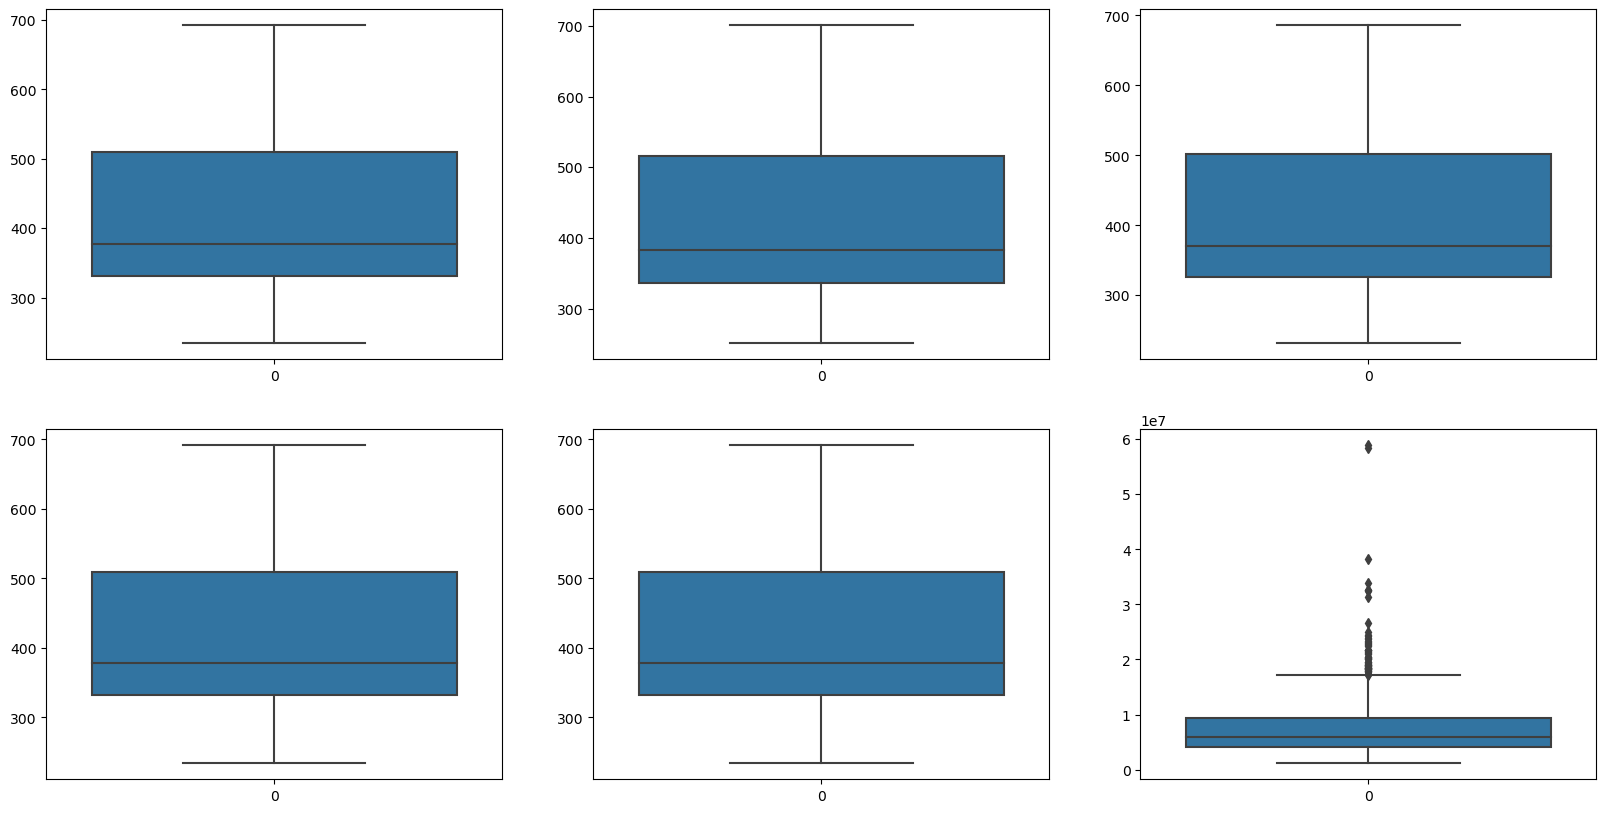

In [11]:
#outliers detection
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

From the boxplots above, we can see that there are no outliers existing for any of the attributes except that of the attribute "Volume" which has a couple of outliers.

## Data Summary

In [12]:
# Obtain the descriptive statistics for this dataframe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


The summary statistics provide valuable information about the statistical properties of the Netflix Stock Prices dataset. Here's how you can interpret the output:

count: This represents the number of observations available for each attribute. In this case, there are 1009 observations for each attribute.

mean: It shows the average value of each attribute. For example, the mean "Close" price is approximately 419.001.

std: The standard deviation indicates the dispersion or variability of the values around the mean. A higher standard deviation suggests a wider range of values. For instance, the standard deviation of the "Close" price is approximately 108.290, indicating a significant fluctuation in the closing prices.

min: It represents the minimum value observed for each attribute. In this dataset, the minimum "Close" price is 233.880005.

25%: The 25th percentile, also known as the first quartile, indicates the value below which 25% of the data falls. For example, 25% of the "Close" prices are below 331.619995.

50%: The 50th percentile, also known as the median or second quartile, represents the value below which 50% of the data falls. For instance, 50% of the "Close" prices are below 378.670013.

75%: The 75th percentile, or the third quartile, indicates the value below which 75% of the data falls. In this case, 75% of the "Close" prices are below 509.079987.

max: This represents the maximum value observed for each attribute. The maximum "Close" price in this dataset is 691.690002.

In [13]:
# Extract day, month, and year components from the attribute "date" and add these 3 columns into this dataframe
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [14]:
# Create five new columns. 
# We are trying to extract "week", "month", "quarter", "year" & "day" components from the attribute "date"
df['week'] = df['Date'].dt.strftime('%Y-W%V')
df['month'] = df['Date'].dt.strftime('%Y-%m')
df['quarter'] = df['Date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['Date'].dt.strftime('%Y')
df['Day'] = df['Date'].dt.day


In [15]:
# Obtain the first 10 rows of this dataframe to check if these columns have been added
df['quarter_number'] = df['quarter'].str.replace('\d{4}-', 'Q', regex=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,week,month,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,2018-W06,2018-02,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,12,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,13,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,14,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,15,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,16,2,2018,2018-W07,2018-02,2018-Q1,2018,QQ1


In [16]:
# Drop the attribute "Year"
df = df.drop({'Year'}, axis = 1)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,week,month,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018-W06,2018-02,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018-W06,2018-02,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018-W06,2018-02,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018-W06,2018-02,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018-W06,2018-02,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,12,2,2018-W07,2018-02,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,13,2,2018-W07,2018-02,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,14,2,2018-W07,2018-02,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,15,2,2018-W07,2018-02,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,16,2,2018-W07,2018-02,2018-Q1,2018,QQ1


In [17]:
df = df.drop({'month'}, axis = 1)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,week,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018-W06,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018-W06,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018-W06,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018-W06,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018-W06,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,12,2,2018-W07,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,13,2,2018-W07,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,14,2,2018-W07,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,15,2,2018-W07,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,16,2,2018-W07,2018-Q1,2018,QQ1


In [18]:
# Let us convert the values for the attribute "day" to days of the week, "month" to names of the month
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,week,quarter,year,quarter_number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,Monday,February,2018-W06,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,Tuesday,February,2018-W06,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,Wednesday,February,2018-W06,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,Thursday,February,2018-W06,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,Friday,February,2018-W06,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,Monday,February,2018-W07,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,Tuesday,February,2018-W07,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,Wednesday,February,2018-W07,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,Thursday,February,2018-W07,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,Friday,February,2018-W07,2018-Q1,2018,QQ1


In [19]:
# Rename certain attributes
df = df.rename({'week': 'Week'}, axis = 1)
df = df.rename({'quarter':'Quarter'}, axis = 1)
df = df.rename({'year':'Year'}, axis = 1)
df = df.rename({'quarter_number':'Quarter_Number'}, axis = 1)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Week,Quarter,Year,Quarter_Number
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,Monday,February,2018-W06,2018-Q1,2018,QQ1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,Tuesday,February,2018-W06,2018-Q1,2018,QQ1
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,Wednesday,February,2018-W06,2018-Q1,2018,QQ1
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,Thursday,February,2018-W06,2018-Q1,2018,QQ1
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,Friday,February,2018-W06,2018-Q1,2018,QQ1
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,Monday,February,2018-W07,2018-Q1,2018,QQ1
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,Tuesday,February,2018-W07,2018-Q1,2018,QQ1
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,Wednesday,February,2018-W07,2018-Q1,2018,QQ1
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,Thursday,February,2018-W07,2018-Q1,2018,QQ1
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,Friday,February,2018-W07,2018-Q1,2018,QQ1


In [20]:
# Obtain the descriptive statistics grouped by the day, month & year
# Convert the "Year" column data type to object
statistics = df.groupby(['Day', 'Month', 'Year', 'Quarter']).describe()

# Display the statistics
print(statistics)

                                  Open                                     \
                                 count        mean        std         min   
Day       Month     Year Quarter                                            
Friday    April     2018 2018-Q2   4.0  313.715004  17.958655  289.100006   
                    2019 2019-Q2   3.0  366.013336   4.621584  360.690002   
                    2020 2020-Q2   3.0  407.823334  35.075541  367.470001   
                    2021 2021-Q2   4.0  529.309998  25.822485  505.000000   
          August    2018 2018-Q3   5.0  346.066004  18.306039  319.010010   
...                                ...         ...        ...         ...   
Wednesday October   2021 2021-Q4   4.0  638.732498  20.360612  625.570007   
          September 2018 2018-Q3   4.0  366.654999   8.225595  359.079987   
                    2019 2019-Q3   4.0  281.912502  17.880395  255.710007   
                    2020 2020-Q3   5.0  511.318011  26.250314  491.040009   

In [21]:
# Obtain the descriptive statistics only for the attribute "year"
yearly_statistics = df.groupby(['Year']).describe()
yearly_statistics


Open                                                             \
      count        mean        std         min         25%         50%   
Year                                                                     
2018  228.0  328.239869  42.361641  233.919998  294.942497  328.395005   
2019  252.0  328.637064  34.821612  255.710007  295.917503  334.650009   
2020  253.0  446.141462  66.063963  302.399994  380.000000  468.540009   
2021  252.0  558.536229  56.318164  479.750000  512.589996  544.204987   
2022   24.0  481.294167  79.436005  378.269989  401.584999  516.299988   

                               High              ...   Adj Close              \
             75%         max  count        mean  ...         75%         max   
Year                                             ...                           
2018  359.827492  421.380005  228.0  333.973245  ...  361.242500  418.970001   
2019  359.705009  382.769989  252.0  332.998691  ...  359.497490  385.029999   
2020  495.440002  567.979980  253.0  454.320039  ...  495.989990  556.549988   
2021  598.277496  692.349976  252.0  565.129443  ...  599.827500  691.690002   
2022  539.934998  605.609985   24.0  488.809583  ...  540.097489  597.369995   

     Volume                                                                \
      count          mean           std        min        25%         50%   
Year                                                                        
2018  228.0  1.149871e+07  5.727002e+06  3577700.0  7964025.0  10451850.0   
2019  252.0  7.857729e+06  4.656262e+06  2019300.0  5106350.0   6336950.0   
2020  253.0  6.933901e+06  3.973960e+06  1144000.0  4485800.0   5840500.0   
2021  252.0  3.914548e+06  2.829989e+06  1287200.0  2597000.0   3241950.0   
2022   24.0  1.234271e+07  1.264509e+07  3067500.0  4383200.0   7815900.0   

                              
             75%         max  
Year                          
2018  13791225.0  58410400.0  
2019   8869475.0  38258900.0  
2020   7881100.0  24991400.0  
2021   4326000.0  32637500.0  
2022  14545950.0  58904300.0  

[5 rows x 48 columns]

In [22]:
# Obtain the yearly statistics for the attribute "close"
sub_df = df.copy()[["Close", "Year"]]
yearly_statistics = sub_df.groupby(['Year']).describe()
yearly_statistics

Close                                                             \
      count        mean        std         min         25%         50%   
Year                                                                     
2018  228.0  327.711842  42.178553  233.880005  294.045006  327.195007   
2019  252.0  328.872380  34.489629  254.589996  296.892494  334.430008   
2020  253.0  446.827233  65.612631  298.839996  381.049988  469.959991   
2021  252.0  558.217697  56.002362  484.980011  512.345016  543.330017   
2022   24.0  477.477085  77.145863  359.700012  403.575004  509.524994   

                              
             75%         max  
Year                          
2018  361.242500  418.970001  
2019  359.497490  385.029999  
2020  495.989990  556.549988  
2021  599.827500  691.690002  
2022  540.097489  597.369995

The output provided shows the summary statistics of the "Close" attribute grouped by the "Year" column. Here's how you can interpret this output:

count: It represents the number of observations available for each year. For example, in 2018, there are 228 observations for the "Close" attribute.

mean: It shows the average value of the "Close" attribute for each year. For instance, in 2018, the average closing price is approximately 327.712.

std: The standard deviation indicates the dispersion or variability of the "Close" values around the mean for each year. A higher standard deviation suggests a wider range of values. For example, in 2018, the standard deviation of the "Close" prices is approximately 42.179.

min: It represents the minimum "Close" value observed for each year. In 2018, the minimum closing price is 233.880005.

25%: The 25th percentile (first quartile) indicates the value below which 25% of the "Close" values fall for each year. For example, in 2018, 25% of the closing prices are below 294.045006.

50%: The 50th percentile (median or second quartile) represents the value below which 50% of the "Close" values fall for each year. In 2018, 50% of the closing prices are below 327.195007.

75%: The 75th percentile (third quartile) indicates the value below which 75% of the "Close" values fall for each year. In 2018, 75% of the closing prices are below 361.242500.

max: This represents the maximum "Close" value observed for each year. The maximum closing price in 2018 is 418.970001.

In [23]:
# Obtain the monthly statistics
monthly_statistics = df.groupby(['Month']).describe()
monthly_statistics

Open                                                              \
          count        mean         std         min         25%         50%   
Month                                                                         
April      84.0  402.571191   84.975436  273.630005  347.107490  371.184998   
August     88.0  417.242157   97.657476  289.470001  318.630005  368.945007   
December   84.0  433.621668  142.503475  233.919998  296.007499  494.779999   
February   78.0  391.587178   99.078555  247.699997  343.760002  364.925003   
January    81.0  417.425679  102.029259  259.279999  334.700012  351.970001   
July       86.0  439.405232   78.865491  310.510010  371.529999  435.619995   
June       85.0  422.624591   58.537609  341.630005  365.000000  419.980011   
March      87.0  388.095978   82.568663  284.649994  323.520004  359.369995   
May        84.0  402.188808   66.443076  308.709991  349.602493  377.845001   
November   82.0  437.729513  159.430459  254.630005  292.022499  399.475006   
October    89.0  438.188538  144.997606  263.609985  291.000000  378.529999   
September  81.0  436.613210  120.573382  255.710007  342.200012  470.529999   

                                   High              ...   Adj Close  \
                  75%         max count        mean  ...         75%   
Month                                                ...               
April      459.827492  557.000000  84.0  408.427382  ...  455.765007   
August     513.347504  566.119995  88.0  423.055907  ...  515.322525   
December   587.724991  649.479980  84.0  439.696427  ...  587.812484   
February   444.427498  564.440002  78.0  398.389358  ...  450.217507   
January    517.750000  605.609985  81.0  423.948765  ...  515.859985   
July       515.819992  567.979980  86.0  445.814534  ...  516.219986   
June       487.170013  534.059998  85.0  427.926234  ...  485.809998   
March      503.889999  553.340027  87.0  395.330574  ...  498.094986   
May        453.612496  512.650024  84.0  407.189168  ...  452.982491   
November   616.429993  692.349976  82.0  443.788169  ...  610.107513   
October    549.500000  673.760010  89.0  445.397190  ...  541.940002   
September  569.000000  608.049988  81.0  443.464692  ...  573.140015   

                      Volume                                         \
                  max  count          mean           std        min   
Month                                                                 
April      555.309998   84.0  9.092504e+06  5.624815e+06  2151300.0   
August     569.190002   88.0  5.922764e+06  3.619707e+06  1367800.0   
December   628.080017   84.0  5.911524e+06  4.242009e+06  1144000.0   
February   563.590027   78.0  6.981019e+06  3.566973e+06  2069600.0   
January    597.369995   81.0  1.059417e+07  8.713466e+06  2973900.0   
July       548.729980   86.0  9.435716e+06  8.075666e+06  1736000.0   
June       533.500000   85.0  6.481462e+06  4.120215e+06  2269000.0   
March      550.640015   87.0  8.051213e+06  4.172345e+06  2418100.0   
May        509.109985   84.0  5.587292e+06  2.131517e+06  2350500.0   
November   691.690002   82.0  6.427800e+06  4.041903e+06  1867300.0   
October    690.309998   89.0  9.528243e+06  6.648462e+06  2276900.0   
September  610.340027   81.0  6.757469e+06  3.634351e+06  1832000.0   

                                                         
                 25%        50%         75%         max  
Month                                                    
April      4618600.0  8068950.0  11764800.0  33866500.0  
August     3119375.0  5371900.0   7391175.0  20373700.0  
December   3009775.0  4259150.0   9612875.0  21397600.0  
February   4093675.0  6786450.0   9050200.0  22542300.0  
January    4718300.0  7550800.0  13480100.0  58904300.0  
July       4417100.0  6973900.0  11806400.0  58410400.0  
June       4138600.0  5277300.0   7112300.0  22490900.0  
March      5052400.0  7405500.0  10244500.0  20369200.0  
May        4091375.0  5410250.0   659332

In [24]:
# Obtain the monthly statistics only for the attribute "close"
sub_df = df.copy()[["Close", "Month"]]
monthly_statistics = sub_df.groupby(['Month']).describe()
monthly_statistics

Close                                                              \
          count        mean         std         min         25%         50%   
Month                                                                         
April      84.0  402.764880   85.402772  280.290009  345.667496  371.474991   
August     88.0  418.226703   99.078194  291.029999  319.332497  369.735000   
December   84.0  433.316666  141.969983  233.880005  298.485001  497.914994   
February   78.0  392.562565   99.157448  249.470001  346.190010  366.860001   
January    81.0  416.347902   98.889153  267.660004  337.589996  353.190002   
July       86.0  439.735000   78.982256  307.299988  368.262504  447.930008   
June       85.0  422.703059   58.558347  336.630005  365.209991  418.070007   
March      87.0  387.755173   81.953976  285.769989  321.424988  358.820007   
May        84.0  402.403333   65.742601  311.690002  348.919998  378.934998   
November   82.0  437.154147  157.793197  258.820007  293.162490  399.000000   
October    89.0  437.306401  146.199918  266.690002  287.410004  377.140015   
September  81.0  436.326172  121.169638  254.589996  341.179993  470.200012   

                                   
                  75%         max  
Month                              
April      455.765007  555.309998  
August     515.322525  569.190002  
December   587.812484  628.080017  
February   450.217507  563.590027  
January    515.859985  597.369995  
July       516.219986  548.729980  
June       485.809998  533.500000  
March      498.094986  550.640015  
May        452.982491  509.109985  
November   610.107513  691.690002  
October    541.940002  690.309998  
September  573.140015  610.340027

The output above shows the summary statistics of the "Close" attribute grouped by the "Month" column. Here's how you can interpret this output:

count: It represents the number of observations available for each month. For example, in April, there are 84 observations for the "Close" attribute.

mean: It shows the average value of the "Close" attribute for each month. For instance, in April, the average closing price is approximately 402.765.

std: The standard deviation indicates the dispersion or variability of the "Close" values around the mean for each month. A higher standard deviation suggests a wider range of values. For example, in April, the standard deviation of the "Close" prices is approximately 85.403.

min: It represents the minimum "Close" value observed for each month. In April, the minimum closing price is 280.290009.

25%: The 25th percentile (first quartile) indicates the value below which 25% of the "Close" values fall for each month. For example, in April, 25% of the closing prices are below 345.667496.

50%: The 50th percentile (median or second quartile) represents the value below which 50% of the "Close" values fall for each month. In April, 50% of the closing prices are below 371.474991.

75%: The 75th percentile (third quartile) indicates the value below which 75% of the "Close" values fall for each month. In April, 75% of the closing prices are below 455.765007.

max: This represents the maximum "Close" value observed for each month. The maximum closing price in April is 555.309998.

By examining these summary statistics grouped by the month, we can compare the central tendency, spread, and range of the "Close" attribute across different months. It provides insights into the average performance, variability, and extreme values of the closing prices for each month, helping us understand any monthly patterns, seasonality, or trends in the stock prices of Netflix.

In [25]:
# Obtain the monthly statistics only for the attribute "close"
sub_df = df.copy()[["Close", "Day"]]
daily_statistics = sub_df.groupby(['Day']).describe()
daily_statistics

Close                                                              \
           count        mean         std         min         25%         50%   
Day                                                                            
Friday     201.0  416.273580  108.308585  246.389999  332.670013  374.130005   
Monday     192.0  417.470781  109.570660  233.880005  329.287507  378.005004   
Thursday   204.0  419.565343  107.392210  250.100006  331.474999  379.279999   
Tuesday    207.0  420.675169  108.422918  254.589996  333.180008  375.500000   
Wednesday  205.0  420.854976  108.806880  253.669998  330.299988  379.929993   

                                   
                  75%         max  
Day                                
Friday     505.549988  690.309998  
Monday     511.212494  681.169983  
Thursday   509.019997  682.020020  
Tuesday    509.230011  687.400024  
Wednesday  508.899994  691.690002

The output provided shows the summary statistics of the "Close" attribute grouped by the "Day" column. Here's how you can interpret this output in simple words:

count: It represents the number of observations available for each day of the week. For example, for Fridays, there are 201 observations for the "Close" attribute.

mean: It shows the average value of the "Close" attribute for each day of the week. For instance, the average closing price for Fridays is approximately 416.274.

std: The standard deviation indicates the dispersion or variability of the "Close" values around the mean for each day of the week. A higher standard deviation suggests a wider range of values. For example, the standard deviation of the "Close" prices for Fridays is approximately 108.309.

min: It represents the minimum "Close" value observed for each day of the week. For Fridays, the minimum closing price is 246.390.

25%: The 25th percentile (first quartile) indicates the value below which 25% of the "Close" values fall for each day of the week. For example, 25% of the closing prices for Fridays are below 332.670013.

50%: The 50th percentile (median or second quartile) represents the value below which 50% of the "Close" values fall for each day of the week. For Fridays, 50% of the closing prices are below 374.130005.

75%: The 75th percentile (third quartile) indicates the value below which 75% of the "Close" values fall for each day of the week. For Fridays, 75% of the closing prices are below 505.549988.

max: This represents the maximum "Close" value observed for each day of the week. The maximum closing price for Fridays is 690.309998.

In [26]:
# Obtain the quarterly statistics of the netflix close prices
sub_df = df.copy()[["Close", "Quarter"]]
quarterly_statistics = sub_df.groupby(['Quarter']).describe()
quarterly_statistics

Close                                                             \
        count        mean        std         min         25%         50%   
Quarter                                                                    
2018-Q1  38.0  294.255790  24.161715  249.470001  278.527489  294.755005   
2018-Q2  64.0  340.896877  35.886758  280.290009  313.089989  330.959992   
2018-Q3  63.0  362.951427  23.773844  316.779999  346.164993  362.869995   
2018-Q4  63.0  299.257778  36.623752  233.880005  267.320007  290.059998   
2019-Q1  61.0  346.668853  21.061605  267.660004  339.100006  353.369995   
2019-Q2  63.0  360.782222  10.869235  336.630005  352.804993  360.869995   
2019-Q3  64.0  312.889529  34.415997  254.589996  291.549996  303.544999   
2019-Q4  64.0  296.481718  19.127210  266.690002  282.662491  293.235001   
2020-Q1  62.0  353.777258  21.032522  298.839996  338.637497  355.140000   
2020-Q2  63.0  425.617778  24.878364  361.760010  418.779998  426.750000   
2020-Q3  64.0  497.697814  21.082685  466.929993  483.255005  492.089996   
2020-Q4  64.0  506.976873  21.520971  470.500000  487.984993  503.794998   
2021-Q1  61.0  530.436068  22.795208  493.329987  511.290009  524.030029   
2021-Q2  63.0  511.163331  21.974741  484.980011  494.909988  503.179993   
2021-Q3  64.0  550.313280  31.891105  510.720001  519.202484  542.295013   
2021-Q4  64.0  638.920622  29.442955  586.729980  613.012497  634.304993   
2022-Q1  24.0  477.477085  77.145863  359.700012  403.575004  509.524994   

                                 
                75%         max  
Quarter                          
2018-Q1  316.870003  331.440002  
2018-Q2  362.314995  416.760010  
2018-Q3  370.465012  418.970001  
2018-Q4  326.695007  381.429993  
2019-Q1  359.609985  377.869995  
2019-Q2  368.104996  385.029999  
2019-Q3  325.389992  381.720001  
2019-Q4  310.112495  336.899994  
2020-Q1  370.637496  387.779999  
2020-Q2  439.845001  468.040009  
2020-Q3  507.204994  556.549988  
2020-Q4  525.897492  554.090027  
2021-Q1  548.219971  586.340027  
2021-Q2  527.640015  555.309998  
2021-Q3  583.114990  610.340027  
2021-Q4  664.075028  691.690002  
2022-Q1  540.097489  597.369995

The output above shows the summary statistics of the "Close" attribute grouped by the "Quarter" column. Here's how you can interpret this output:

count: It represents the number of observations available for each quarter. For example, in the first quarter of 2018 (2018-Q1), there are 38 observations for the "Close" attribute.

mean: It shows the average value of the "Close" attribute for each quarter. For instance, the average closing price for the first quarter of 2018 is approximately 294.256.

std: The standard deviation indicates the dispersion or variability of the "Close" values around the mean for each quarter. A higher standard deviation suggests a wider range of values. For example, the standard deviation of the "Close" prices for the first quarter of 2018 is approximately 24.162.

min: It represents the minimum "Close" value observed for each quarter. For the first quarter of 2018, the minimum closing price is 249.470001.

25%: The 25th percentile (first quartile) indicates the value below which 25% of the "Close" values fall for each quarter. For example, 25% of the closing prices for the first quarter of 2018 are below 278.527489.

50%: The 50th percentile (median or second quartile) represents the value below which 50% of the "Close" values fall for each quarter. For the first quarter of 2018, 50% of the closing prices are below 294.755005.

75%: The 75th percentile (third quartile) indicates the value below which 75% of the "Close" values fall for each quarter. For the first quarter of 2018, 75% of the closing prices are below 316.870003.

max: This represents the maximum "Close" value observed for each quarter. The maximum closing price for the first quarter of 2018 is 331.440002.

It provides insights into the average performance, variability, and extreme values of the closing prices for each quarter, helping us understand any patterns or trends in the stock prices of Netflix based on the quarterly time frame.

In [27]:
# Obtain the sum of the close prices per year
sub_df = df.copy()[["Close", "Year"]]
close_prices_year = sub_df.groupby(['Year']).sum().reset_index()
close_prices_year = close_prices_year.rename({'Close':'Total Close Price'}, axis = 1)
close_prices_year.head()

,Year,Total Close Price
0,2018,74718.300064
1,2019,82875.839777
2,2020,113047.289916
3,2021,140670.859718
4,2022,11459.450042


The output provided shows the total close price for each year in the dataset. Here's how you can interpret this output:

Year: It represents the year for which the total close price is calculated.
Total Close Price: It shows the sum of the close prices for the corresponding year.

We can observe that the sum of the close prices were the highest in the year 2021 and lowest in the year 2022.

In [28]:
# Obtain the sum of the close prices per quarter
sub_df = df.copy()[["Close", "Quarter"]]
close_prices_quarter = sub_df.groupby(['Quarter']).sum().reset_index()
close_prices_quarter = close_prices_quarter.rename({'Close': 'Total Close Price'}, axis = 1)
close_prices_quarter

,Quarter,Total Close Price
0,2018-Q1,11181.720017
1,2018-Q2,21817.400116
2,2018-Q3,22865.939909
3,2018-Q4,18853.240022
4,2019-Q1,21146.800013
5,2019-Q2,22729.279968
6,2019-Q3,20024.929872
7,2019-Q4,18974.829924
8,2020-Q1,21934.189969
9,2020-Q2,26813.919984


From this, we can see that the 1st quarter of 2018 has the lowest sum of the close prices & the 4th quarter of 2021 has the highest sum of the close prices.

In [29]:
# Obtain the total close prices for each week
sub_df = df.copy()[["Close", "Week"]]
close_prices_week = sub_df.groupby(['Week']).sum().reset_index()
close_prices_week = close_prices_week.rename({'Close':'Total Close Price'}, axis = 1)
close_prices_week

,Week,Total Close Price
0,2018-W01,267.660004
1,2018-W06,1284.110001
2,2018-W07,1341.009979
3,2018-W08,1123.660005
4,2018-W09,1467.589997
...,...,...
205,2022-W01,2850.390015
206,2022-W02,2662.799988
207,2022-W03,1932.409973
208,2022-W04,1884.330016


In [30]:
sub_df = df.copy()[["Close", "Day"]]
close_prices_day = sub_df.groupby(['Day']).sum().reset_index()
close_prices_day = close_prices_day.rename({'Close':'Total Close Price'}, axis = 1)
close_prices_day

,Day,Total Close Price
0,Friday,83670.989517
1,Monday,80154.389907
2,Thursday,85591.329984
3,Tuesday,87079.759952
4,Wednesday,86275.270157


We can see that the total close price was the highest on Tuesday & the lowest on Monday.

## Visualize the data

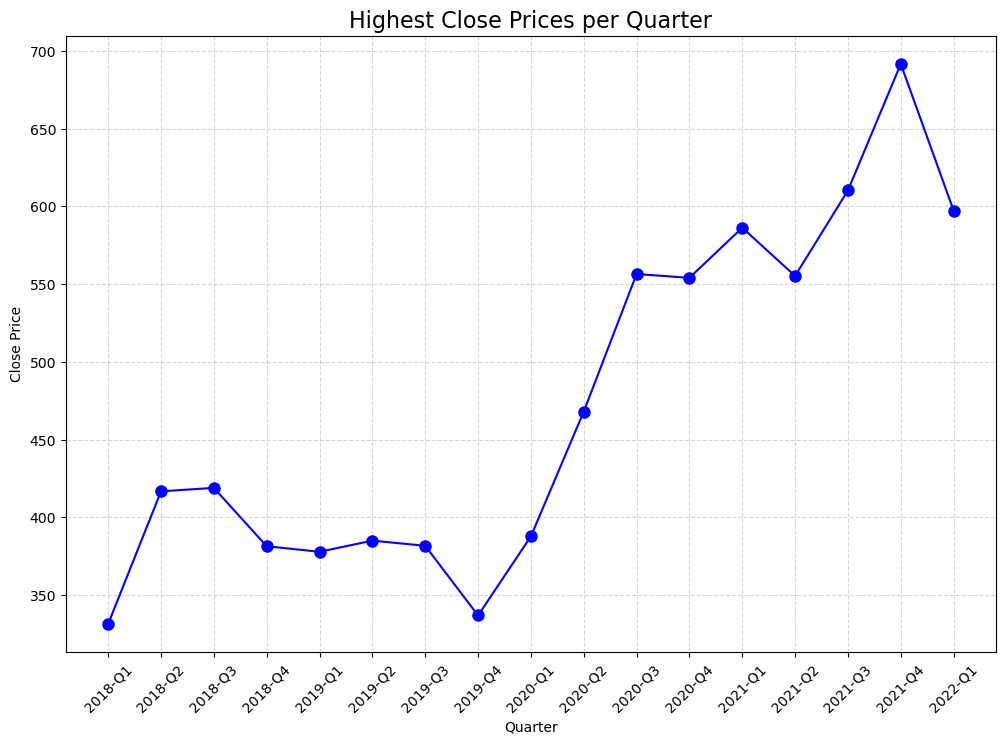

In [31]:
# Create a line plot to visualize the highest close prices per quarter
sub_df = df.copy()[["Close", "Quarter"]]
quarterly_max = sub_df.groupby(['Quarter']).max()

# Create a line plot to visualize the highest close prices per quarter
plt.figure(figsize=(12, 8))  # Adjust the figure size according to your preference

# Customize the line plot
plt.plot(quarterly_max.index, quarterly_max['Close'], color='b', linestyle='-', marker='o', markersize=8)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Close Price')

# Customize the tick labels on x-axis
plt.xticks(quarterly_max.index, rotation=45)

# Add title and adjust the font size
plt.title('Highest Close Prices per Quarter', fontsize=16)

# Adjust the plot margins
plt.margins(0.05)

# Show the plot
plt.show()


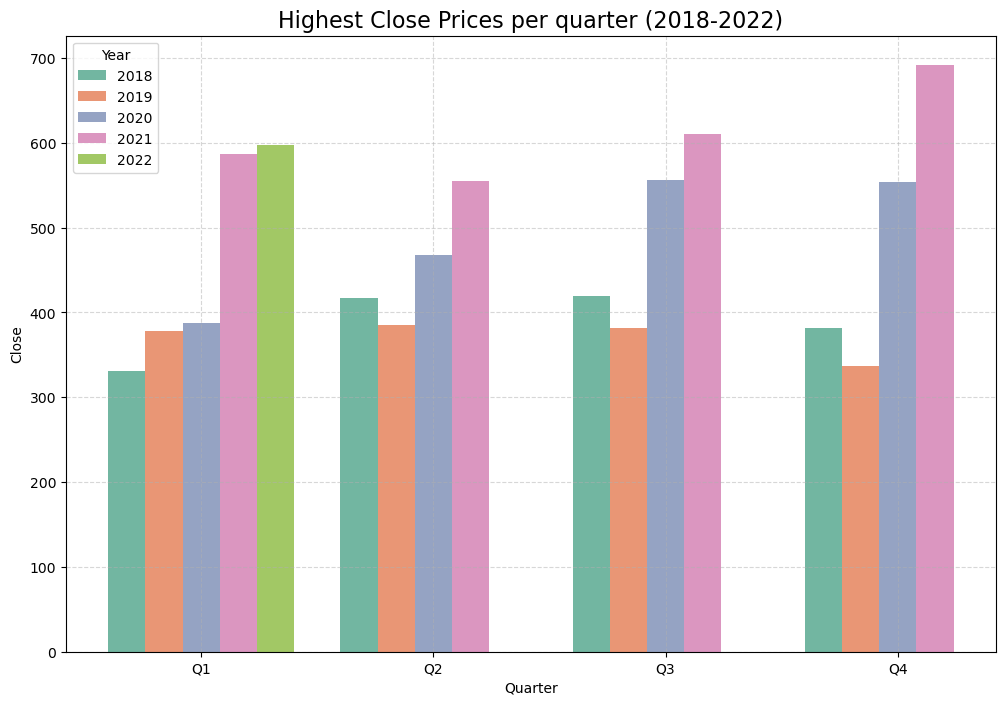

In [32]:
# Create a grouped bar plot that represents the highest close prices per quarter (2018-2022)
import matplotlib.pyplot as plt
import seaborn as sns

sub_df = df.copy()[["Close", "Quarter", "Year"]]
sub_df['Quarter_Number'] = sub_df['Quarter'].str[-2:]
quarterly_max = sub_df.groupby(['Quarter_Number', 'Year'])['Close'].max().reset_index()

plt.figure(figsize=(12, 8))

# Customize the color palette
sns.set_palette("Set2")

p = sns.barplot(
    data=quarterly_max,
    x='Quarter_Number',
    y='Close',
    hue='Year')

# Add value labels to the bars
for b in p.patches:
    p.annotate(
        str(round(b.get_height(), 1)),
        (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6),
        ha='center', va='bottom',
        xytext=(0, -12),
        textcoords='offset points')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Close')

# Set title and adjust the font size
plt.title('Highest Close Prices per quarter (2018-2022)', fontsize=16)

# Add legend with a title
plt.legend(title='Year')

# Adjust plot margins
plt.margins(0.05)

# Show the plot
plt.show()







This bar plot displays the highest close prices for each quarter during each year. 

Quarter 1: Highest close price was during the year 2022 and it was 600 and the second highest price was during the year 2021 and it was slightly less than 600. While we can see that the year 2018 had the lowest close price. It was only above 300 during that time.

Quarter 2: Highest close price was above 500 and it was during the year 2021 while the year 2019 had the lowest close price and it was somewhere in between 300 & 400. 

Quarter 3: Highest close was more than 600 and it was during the year 2021 while the year 2019 had the lowest close price. It was way below 400. 

Quarter 4: Highest close was nearly 700 and it was during the year 2021 while the year 2019 had the lowest closing price. 



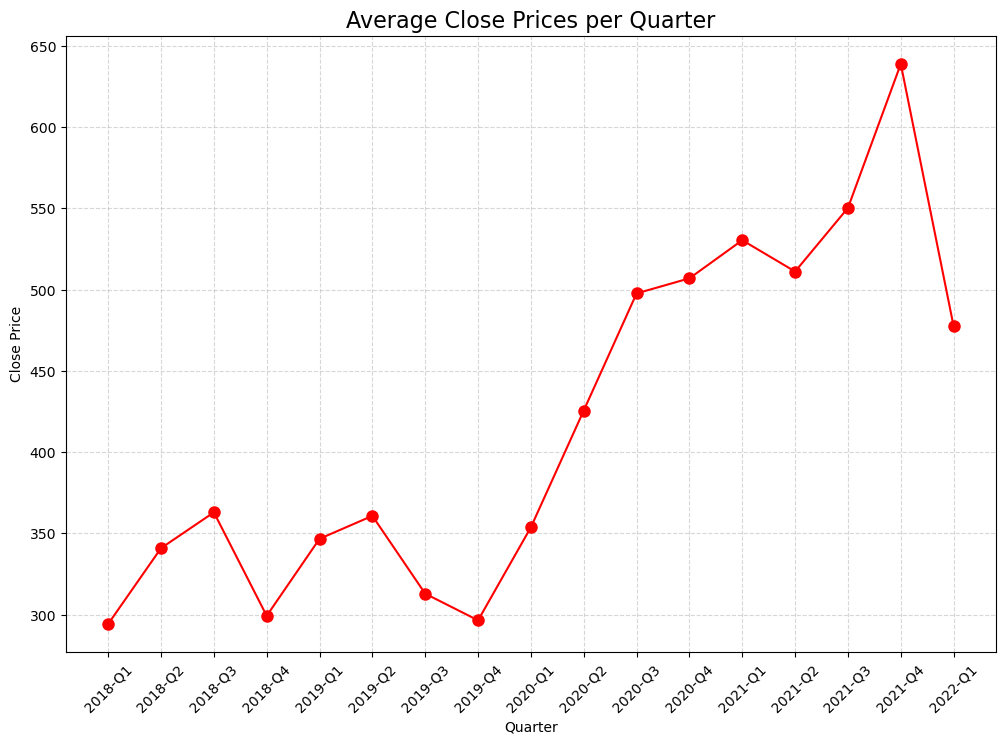

In [33]:
sub_df = df.copy()[["Close", "Quarter"]]
quarterly_mean = sub_df.groupby(['Quarter']).mean()

# Create a line plot to visualize the average close prices per quarter
plt.figure(figsize=(12, 8))  # Adjust the figure size according to your preference

# Customize the line plot
plt.plot(quarterly_mean.index, quarterly_mean['Close'], color='r', linestyle='-', marker='o', markersize=8)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Close Price')

# Customize the tick labels on x-axis
plt.xticks(quarterly_max.index, rotation=45)

# Add title and adjust the font size
plt.title('Average Close Prices per Quarter', fontsize=16)

# Adjust the plot margins
plt.margins(0.05)

# Show the plot
plt.show()


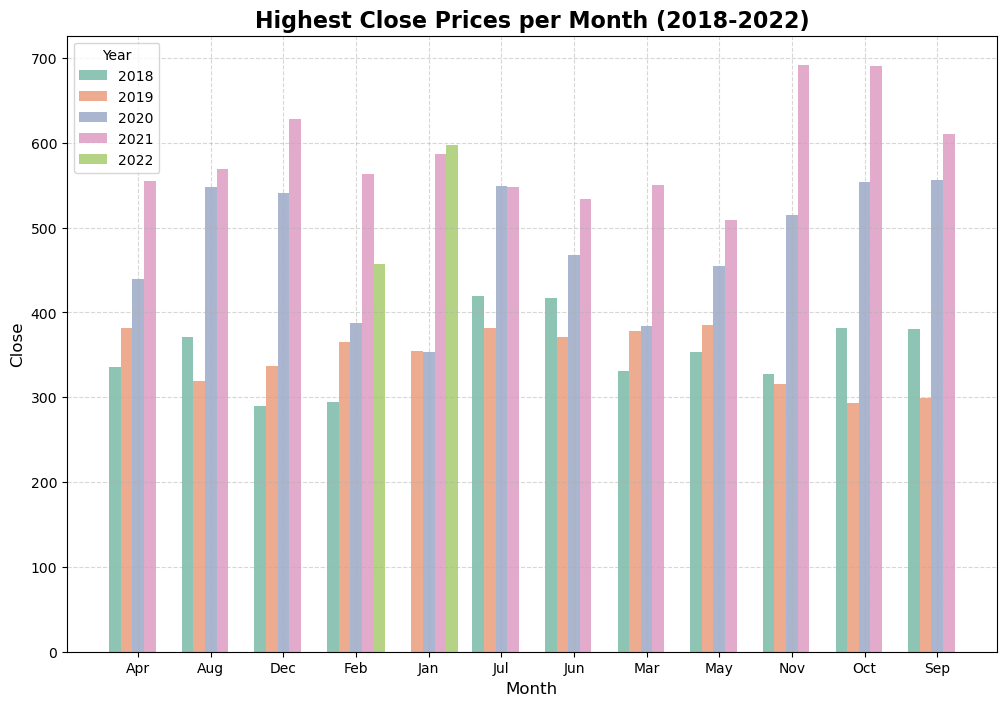

In [34]:
# Create a grouped bar plot displaying the close prices grouped by the month & the year
sub_df = df.copy()[["Close", "Month", "Year"]]
sub_df['Month'] = sub_df['Month'].str.slice(stop=3)
monthly_max = sub_df.groupby(['Month', 'Year'])['Close'].max().reset_index()

plt.figure(figsize=(12, 8))

# Customize the color palette
sns.set_palette("Set2")

# Create the bar plot
p = sns.barplot(
    data=monthly_max,
    x='Month',
    y='Close',
    hue='Year',
    alpha=0.8)

# Add value labels to the bars
for b in p.patches:
    p.annotate(
        str(round(b.get_height(), 1)),
        (b.get_x() + b.get_width() / 2., b.get_height() + 1000000),
        ha='center', va='bottom',
        xytext=(0, -12),
        textcoords='offset points',
        fontsize=10,
        color='black')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Month', fontsize=12)
plt.ylabel('Close', fontsize=12)

# Set title and adjust the font size
plt.title('Highest Close Prices per Month (2018-2022)', fontsize=16, fontweight='bold')

# Add legend with a title
plt.legend(title='Year', fontsize=10)

# Adjust plot margins
plt.margins(0.05)

# Show the plot
plt.show()

        

The grouped bar plot visualizes the highest close prices per month for the years 2018-2022. Here's how you can interpret the output:

The x-axis represents the months of the year, with each bar corresponding to a specific month.
The y-axis represents the highest close prices.
Each bar is divided into different colored segments, representing different years (2018, 2019, 2020, 2021, and 2022).
The height of each colored segment within a bar represents the highest close price for that specific month and year combination.
The value labels displayed on top of each bar indicate the exact value of the highest close price for that month and year.
With this plot, you can easily compare the highest close prices across different months and years. You can observe trends or patterns in the data, such as months with consistently high or low close prices, or identify specific months or years with exceptional or unusual close prices.

The legend on the plot indicates which color corresponds to each year, allowing you to identify the bars representing each year's data.

Overall, the plot provides a visual representation of the highest close prices per month, enabling you to analyze and compare the data effectively.

From this plot, it can be observed that the close price was the highest during the month of Nov in the year 2021 and it was the lowest in the month of Dec for the year 2018.

In [35]:
sub_df = df.copy()[["Close", "Day", "Year"]]
sub_df['Day'] = sub_df['Day'].str.slice(stop=3)
daily_max = sub_df.groupby(['Day', 'Year'])['Close'].max().reset_index()
daily_max

,Day,Year,Close
0,Fri,2018,411.089996
1,Fri,2019,385.029999
2,Fri,2020,548.729980
3,Fri,2021,690.309998
4,Fri,2022,541.059998
5,Mon,2018,418.970001
6,Mon,2019,378.670013
7,Mon,2020,539.809998
8,Mon,2021,681.169983
9,Mon,2022,597.369995


The provided output represents a tabular data structure that shows the closing prices of a stock for different days (Friday, Monday, Thursday, Tuesday, Wednesday) across multiple years (2018, 2019, 2020, 2021, 2022).

Each row in the table corresponds to a specific combination of the day of the week, the year, and the closing price. For example, the first row indicates that on Fridays in the year 2018, the closing price of the stock was 411.089996.

The table allows you to compare the closing prices of the stock for different days of the week and across different years. You can observe how the closing prices vary between days within the same year and how they change from year to year for the same day.

By analyzing this data, you can identify any patterns or trends in the stock's performance based on the day of the week. For instance, you can check if there are consistent differences in closing prices between certain days. You can also examine if there are any notable changes in closing prices from year to year.

Overall, this table provides a summary of the closing prices of the stock for each day of the week across multiple years, allowing you to compare and analyze the performance of the stock based on different temporal factors.

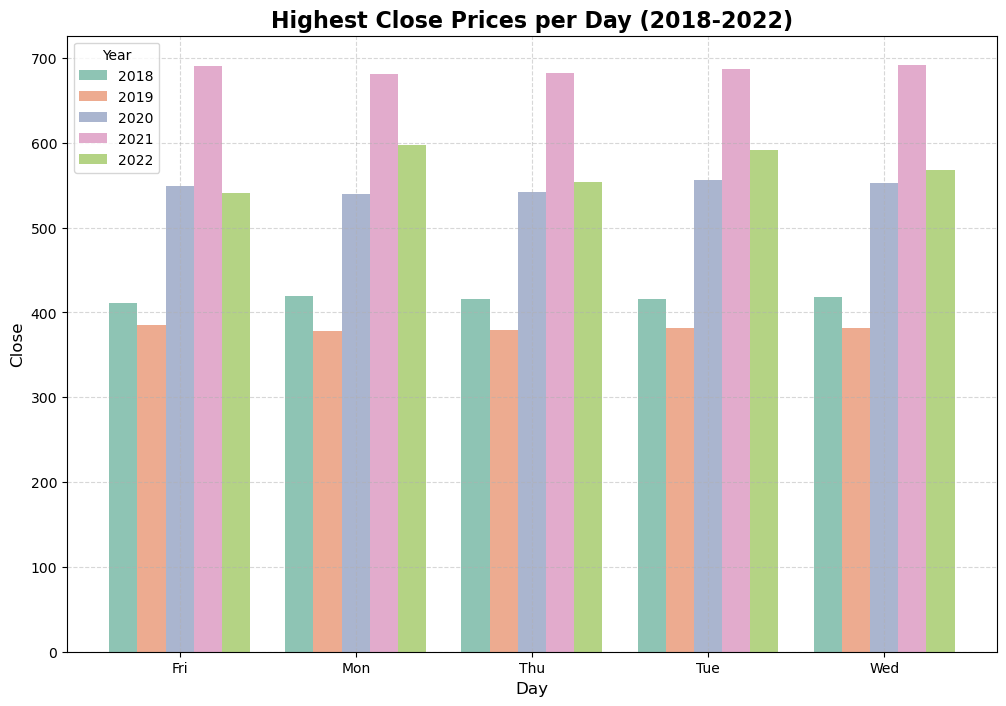

In [36]:
# Create a grouped bar plot representing the above table
sub_df = df.copy()[["Close", "Day", "Year"]]
sub_df['Day'] = sub_df['Day'].str.slice(stop=3)
daily_max = sub_df.groupby(['Day', 'Year'])['Close'].max().reset_index()

plt.figure(figsize=(12, 8))

# Customize the color palette
sns.set_palette("Set2")

# Create the bar plot
p = sns.barplot(
    data=daily_max,
    x='Day',
    y='Close',
    hue='Year',
    alpha=0.8)

# Add value labels to the bars
for b in p.patches:
    p.annotate(
        str(round(b.get_height(), 1)),
        (b.get_x() + b.get_width() / 2., b.get_height() + 1000000),
        ha='center', va='bottom',
        xytext=(0, -12),
        textcoords='offset points',
        fontsize=10,
        color='black')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Day', fontsize=12)
plt.ylabel('Close', fontsize=12)

# Set title and adjust the font size
plt.title('Highest Close Prices per Day (2018-2022)', fontsize=16, fontweight='bold')

# Add legend with a title
plt.legend(title='Year', fontsize=10)

# Adjust plot margins
plt.margins(0.05)

# Show the plot
plt.show()


The plotted graph represents the highest close prices per day for the years 2018-2022. Here's how you can interpret this plot and understand the information it conveys:

The x-axis represents the days, with each bar corresponding to a specific day.
The y-axis represents the highest close prices recorded for each day.
Each bar is divided into different colored segments, representing different years (2018, 2019, 2020, 2021, and 2022).
The height of each colored segment within a bar represents the highest close price for that specific day and year combination.
The value labels displayed on top of each bar indicate the exact value of the highest close price for that day and year.
By analyzing this plot, you can draw several insights:

Comparison across days: You can compare the highest close prices across different days of the year. Look for patterns or trends in terms of high or low close prices on specific days. For example, are there certain days that consistently have higher close prices compared to others?

Variation across years: By comparing the colored segments within each bar, you can assess how the highest close prices vary from year to year. Look for differences in the height or placement of the segments to identify years with notable price fluctuations.

Outliers or exceptional days: Identify any outliers or days with significantly higher close prices than the rest. These can indicate events or market conditions that led to exceptional price movements.

Seasonality or cyclic patterns: Analyze if there are any recurrent patterns in the highest close prices across days. For instance, are there specific days or time periods within a year when close prices tend to be consistently high or low?

From the grouped plot above, we can infer that the close price was the highest on Wed during the year 2021 and it was the lowest on Monday during the year 2019.

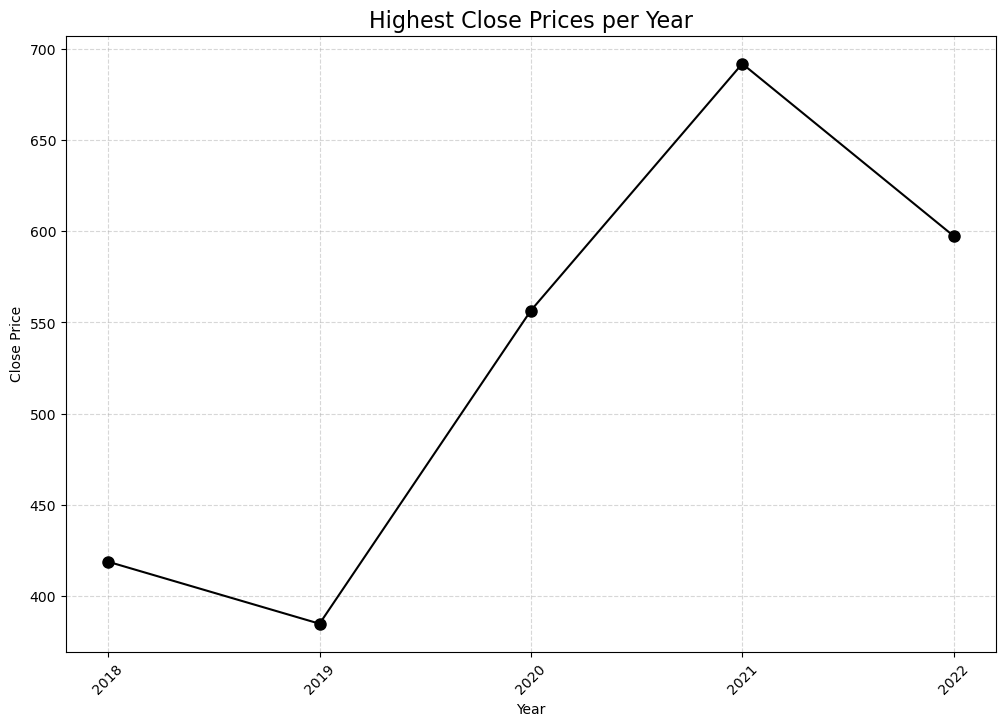

In [37]:
sub_df = df.copy()[["Close", "Year"]]
yearly_max = sub_df.groupby(['Year']).max()

# Create a line plot to visualize the average close prices per quarter
plt.figure(figsize=(12, 8))  # Adjust the figure size according to your preference

# Customize the line plot
plt.plot(yearly_max.index, yearly_max['Close'], color='black', linestyle='-', marker='o', markersize=8)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Close Price')

# Customize the tick labels on x-axis
plt.xticks(yearly_max.index, rotation=45)

# Add title and adjust the font size
plt.title('Highest Close Prices per Year', fontsize=16)

# Adjust the plot margins
plt.margins(0.05)

# Show the plot
plt.show()

From this plot we can see that the year 2021 had the highest close price and the year 2019 had the lowest close price. 

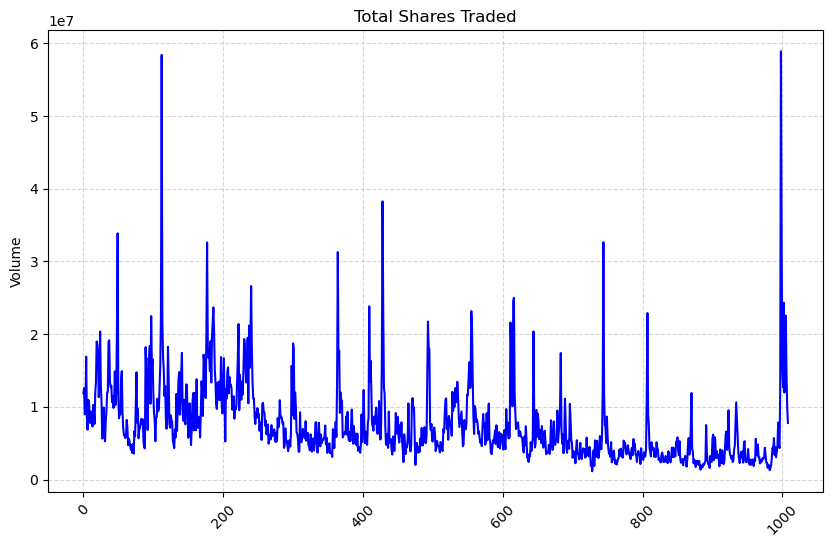

In [38]:

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plot the volume data
df['Volume'].plot(color='blue', linestyle='-', linewidth=1.5)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set the labels and title
plt.ylabel('Volume')
plt.xlabel(None)
plt.title('Total Shares Traded')

# Customize the tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


The plot represents the total shares traded over time in the dataset. The x-axis corresponds to the time period, which could be days, months, or any other time interval depending on the data. The y-axis represents the volume of shares traded during that time period.

Interpreting the plot involves analyzing the fluctuations in the volume of shares traded. By observing the plot, you can identify periods of high or low trading activity. Peaks or spikes in the plot indicate periods of increased trading volume, while valleys or dips represent periods of lower trading volume.

Additionally, you can look for any trends or patterns in the data. Are there any consistent increases or decreases in trading volume over time? Are there any recurring patterns or cycles? These insights can help you understand the dynamics of the market and make informed decisions.

The grid lines provide a visual aid in reading the plot, and the labels on the axes help identify the variables being represented. The title of the plot summarizes its purpose or topic.

In summary, the plot visualizes the total shares traded over time, allowing you to identify periods of high and low trading activity and spot any patterns or trends in the data.

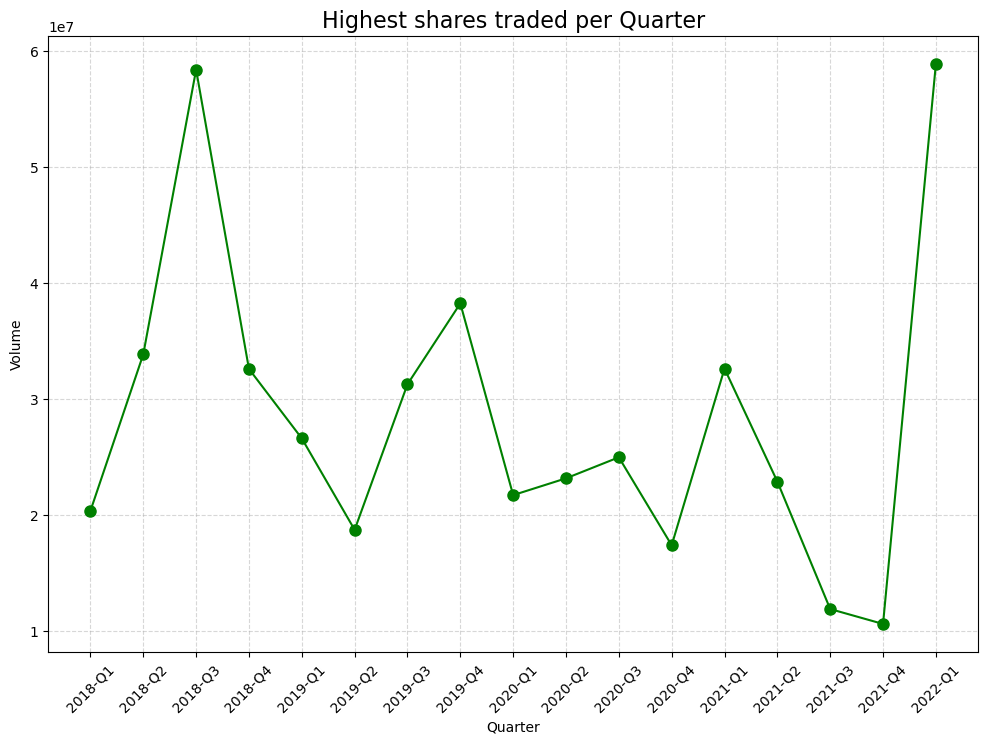

In [39]:
# Create a line plot displaying the highest shares traded per quarter
sub_df = df.copy()[["Volume", "Quarter"]]
quarterly_max = sub_df.groupby(['Quarter']).max()

# Create a line plot to visualize the average close prices per quarter
plt.figure(figsize=(12, 8))  # Adjust the figure size according to your preference

# Customize the line plot
plt.plot(quarterly_max.index, quarterly_max['Volume'], color='green', linestyle='-', marker='o', markersize=8)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels
plt.xlabel('Quarter')
plt.ylabel('Volume')

# Customize the tick labels on x-axis
plt.xticks(quarterly_max.index, rotation=45)

# Add title and adjust the font size
plt.title('Highest shares traded per Quarter', fontsize=16)

# Adjust the plot margins
plt.margins(0.05)

# Show the plot
plt.show()


This line plot represents the highest shares traded per quarter over the given dataset. Each point on the plot represents the maximum volume of shares traded during a specific quarter. The x-axis displays the quarters, while the y-axis represents the volume of shares traded.

By observing the plot, you can identify the quarters with the highest trading activity. The points on the plot show the peak volumes for each quarter. The line connecting the points helps visualize any trends or patterns in the highest trading volumes over time.

Interpreting the plot involves looking at the peaks and their positions relative to one another. You can analyze whether there are any consistent increases or decreases in the highest trading volumes across different quarters. This information can be useful in understanding the overall market activity and identifying periods of high or low trading volume.

In summary, the plot provides a visual representation of the highest shares traded per quarter, allowing you to identify patterns and trends in the trading volume over time.

So, from the given figure, one can infer that the highest trading volume was during the 1st quarter of 2022 and the lowest trading volume was during the 4th quarter of 2021.

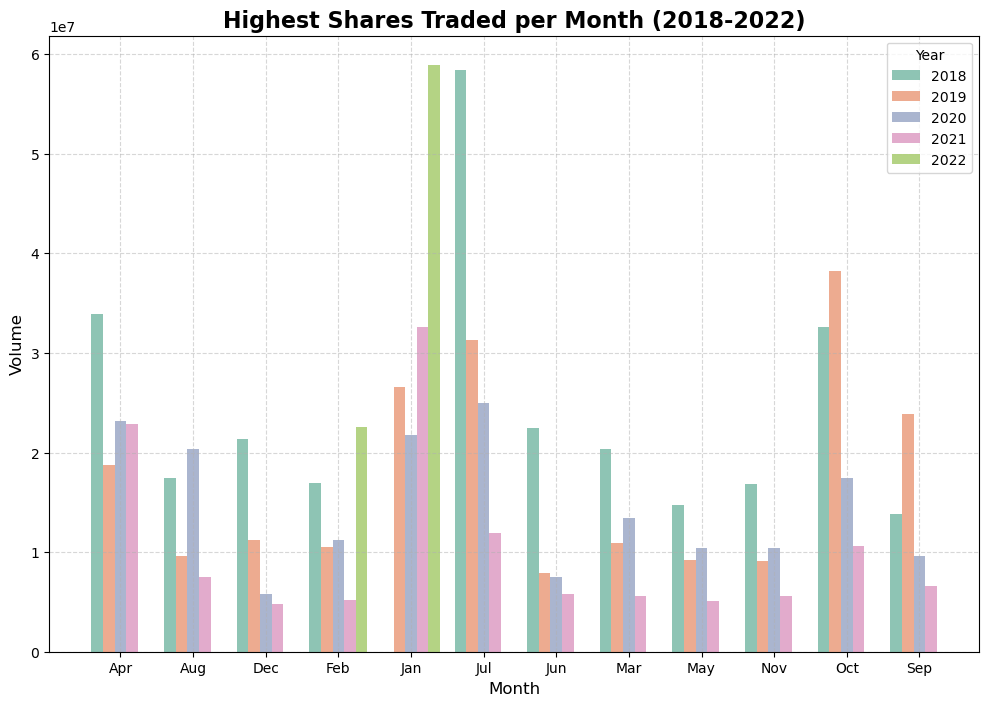

In [40]:
# Create a grouped bar plot displaying the highest shares traded per month from 2018 to 2022
sub_df = df.copy()[["Volume", "Month", "Year"]]
sub_df['Month'] = sub_df['Month'].str.slice(stop=3)
monthly_max = sub_df.groupby(['Month', 'Year'])['Volume'].max().reset_index()

plt.figure(figsize=(12, 8))

# Set a custom color palette
custom_palette = sns.color_palette("Set2")

# Create the bar plot
p = sns.barplot(
    data=monthly_max,
    x='Month',
    y='Volume',
    hue='Year',
    alpha=0.8,
    palette=custom_palette)



# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis and y-axis labels with increased font size
plt.xlabel('Month', fontsize=12)
plt.ylabel('Volume', fontsize=12)

# Set title and adjust the font size and weight
plt.title('Highest Shares Traded per Month (2018-2022)', fontsize=16, fontweight='bold')

# Add legend with a title and adjust font size
plt.legend(title='Year', fontsize=10)

# Adjust plot margins
plt.margins(0.05)

# Show the plot
plt.show()

This is a grouped bar chart that displays the volume of shares traded for each month from the years 2018 to 2022. From the given chart, we can observe that the highest number of shares were traded during the month of Jan in the year 2022. While the lowest number of shares were traded during the month of Dec in the year 2021.

Before we can create any other visualizations such as correlation heatmaps, pairplots etc remove the following attributes from this dataframe ["Year", "Month", "Quarter", "Quarter_Number", "Week"]

In [41]:
df = df.drop({'Year'}, axis = 1)
df = df.drop({'Month'}, axis = 1)
df = df.drop({'Quarter'}, axis = 1)
df = df.drop({'Quarter_Number'}, axis = 1)
df = df.drop({'Week'}, axis = 1)


In [42]:
df = df.drop({'Day'}, axis = 1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


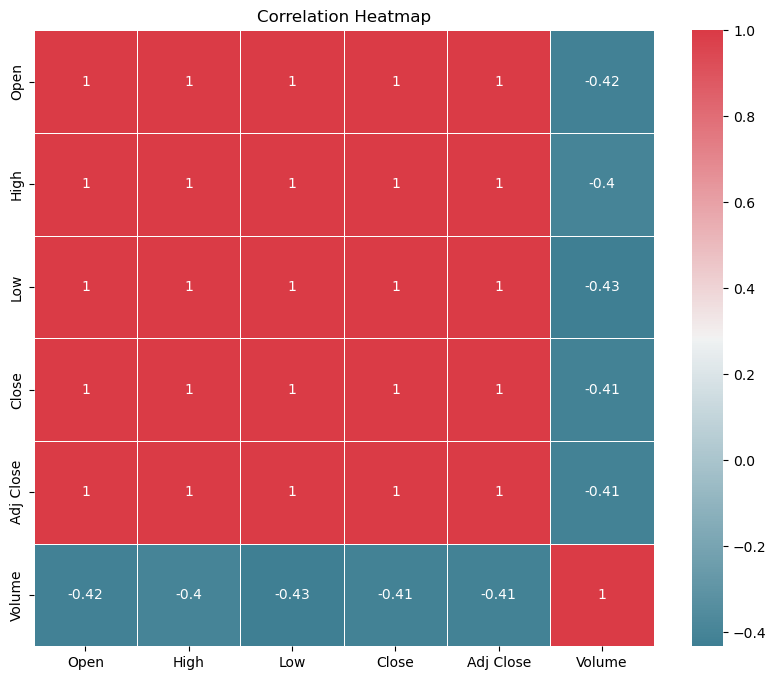

In [43]:
# Create an attractive correlation heatmap
# Create a subset of the dataset with only the numeric columns
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
subset_df = df[numeric_columns]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Customize the color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

TypeError: 'Line2D' object is not iterable

<Figure size 1000x800 with 0 Axes>

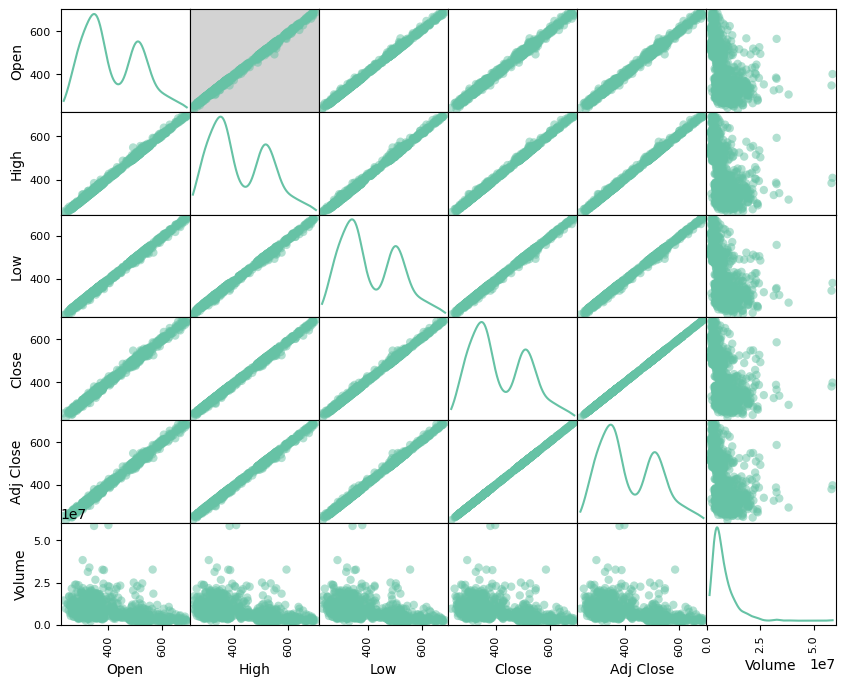

In [44]:
# plot the scatter plot matrix between all variables in the data
import matplotlib.pyplot as plt
import pandas as pd

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(10, 8), marker='o', diagonal='kde')

# Customize the colors of the scatter plots
colors = ['red', 'green', 'blue']  # Add more colors if needed
for ax in scatter_matrix.ravel():
    if ax is not scatter_matrix[0][0]:
        ax.set_facecolor('lightgray')  # Set the background color of the subplots
        for i, j in zip(*ax.plot([], [])):
            i.set_color(colors[i.get_array_index()])
            j.set_color(colors[j.get_array_index()])

# Customize the labels of the scatter plots
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        ax = scatter_matrix[i][j]
        if i == j:
            ax.set_ylabel(df.columns[i])
            ax.set_xlabel(df.columns[j])
        else:
            ax.set_xlabel(df.columns[j])
            ax.set_ylabel(df.columns[i])

# Add gridlines to the scatter plots
for ax in scatter_matrix.ravel():
    ax.grid(True, linestyle='--', alpha=0.5)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# Show the plot
plt.show()


The scatter plot matrix shows that there is an upward trend between all variables, except for the stock volume.

This indicates that all price variables (Open, High, Low, Close, Adj Close) are positively correlated.

In [ ]:
import seaborn as sns

# Set the style of the plot
sns.set(style="ticks")

# Create the pairplot
pairplot = sns.pairplot(df)

# Customize the colors of the scatter plots
pairplot.map_offdiag(sns.scatterplot, alpha=0.7, edgecolor=None)

# Customize the diagonal plots
pairplot.map_diag(sns.histplot, kde=True, color='blue', edgecolor='white')

# Remove spines from the scatter plots
pairplot.map_offdiag(sns.despine)

# Add gridlines to the scatter plots
pairplot.map(sns.gridplot, color='lightgray', linestyle='--', linewidth=0.5)

# Adjust the labels
pairplot.set_titles(fontsize=12)
pairplot.set_xlabels(fontsize=10)
pairplot.set_ylabels(fontsize=10)

# Adjust the layout
pairplot.fig.tight_layout()

# Show the plot
plt.show()


## Machine Learning

### Predictive Modelling

I will be employing 4 machine learning algorithms [Linear Regression, Support Vector Machine, Decision Tree and K-Nearest Neighbors] to predict the Netflix stock price (adjusted close price).


In [ ]:
#import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
# Data Splitting
#define independent variables (X) and dependent variables (Y)
# 80 % of the data can be used for training the data and the remaining 20 % can be used for testing it
X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df["Adj Close"]
#split data into test and training set by setting 20% of data as test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
#data standardization
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Linear Regression

In [ ]:
#develop stock price prediction model using Linear Regression
lr_model=LinearRegression()
#fit the training set to train the model
lr_model.fit(X_train,y_train)
#predict using test set
lr_predict = lr_model.predict(X_test)
#show daily prediction of adjusted close price
print(lr_predict)

In [ ]:
#get the summary of model performance statistic
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, lr_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, lr_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, lr_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, lr_predict), 4))
print(f'Train Score : {lr_model.score(X_train, y_train) * 100:.2f}% and Test Score : {lr_model.score(X_test, y_test) * 100:.2f}% using Linear Regression.')
errors = abs(lr_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE):

The MAE measures the average absolute difference between the predicted values and the actual values. A lower MAE indicates better accuracy.
The MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better accuracy.
The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. A lower RMSE indicates better accuracy.
R-squared (R^2) Score:

The R^2 score represents the proportion of the variance in the target variable (adjusted close prices) that is explained by the linear regression model. A score of 1.0 indicates a perfect fit where the model explains all the variance in the target variable.
Train Score and Test Score:

The train score and test score indicate the accuracy of the model on the training and testing datasets, respectively. A score of 100% suggests that the model perfectly predicts the adjusted close prices in both datasets.
Accuracy:

The accuracy of 100% suggests that the linear regression model predicts the adjusted close prices for the Netflix stock with perfect accuracy.

In summary, the output indicates that this linear regression model performs exceptionally well in predicting the adjusted close prices of the Netflix stock. The model has achieved a perfect fit, as indicated by the high R^2 score, and it accurately predicts the adjusted close prices with no errors, as evidenced by the MAE, MSE, and RMSE values of 0. Additionally, the model demonstrates perfect accuracy on both the training and testing datasets.

## Support Vector Machine

In [ ]:
#develop stock price prediction model using SVM with linear kernel
regr = svm.SVR(kernel='linear')
regr.fit(X_train, y_train)
svm_predict = regr.predict(X_test)
print(svm_predict)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, svm_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, svm_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, svm_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, svm_predict), 4))
print(f'Train Score : {regr.score(X_train, y_train) * 100:.2f}% and Test Score : {regr.score(X_test, y_test) * 100:.2f}% using Support Vector Machine.')
errors = abs(svm_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE):

The MAE measures the average absolute difference between the predicted values and the actual values. In this case, the average absolute difference is approximately 2.0231. A lower MAE indicates better accuracy.
The MSE measures the average squared difference between the predicted values and the actual values. The MSE value is approximately 7.6222. A lower MSE indicates better accuracy.
The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. The RMSE value is approximately 2.7608. A lower RMSE indicates better accuracy.
R-squared (R^2) Score:

The R^2 score represents the proportion of the variance in the target variable (adjusted close prices) that is explained by the SVM model. The R^2 score is approximately 0.9993, which indicates a very high level of explained variance. A score closer to 1 indicates a better fit of the model to the data.
Train Score and Test Score:

The train score and test score indicate the accuracy of the model on the training and testing datasets, respectively. In this case, the model achieved a train score of 99.94% and a test score of 99.93%. This suggests that the SVM model performs very well on both the training and testing datasets.
Accuracy:

The accuracy of 99.52% indicates the overall correctness of the SVM model's predictions. It represents the percentage of correctly predicted adjusted close prices.
In summary, the output suggests that the SVM model performs extremely well in predicting the adjusted close prices of the Netflix stock. The model achieves high accuracy, with a low error rate as indicated by the MAE, MSE, and RMSE values. The R^2 score indicates that the model explains a significant amount of the variance in the target variable. Additionally, the model demonstrates excellent accuracy on both the training and testing datasets, indicating its robustness.

## Decision Tree

In [ ]:
from sklearn import tree


In [ ]:
#develop stock price prediction model using decision tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
dt = clf.predict(X_test)
print(dt)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, dt), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, dt), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, dt)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, dt), 4))
print(f'Train Score : {clf.score(X_train, y_train) * 100:.2f}% and Test Score : {clf.score(X_test, y_test) * 100:.2f}% using Decision Tree.')
errors = abs(dt - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE):

The MAE measures the average absolute difference between the predicted values and the actual values. In this case, the average absolute difference is approximately 0.8755. A lower MAE indicates better accuracy.
The MSE measures the average squared difference between the predicted values and the actual values. The MSE value is approximately 4.8305. A lower MSE indicates better accuracy.
The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. The RMSE value is approximately 2.1978. A lower RMSE indicates better accuracy.
R-squared (R^2) Score:

The R^2 score represents the proportion of the variance in the target variable (adjusted close prices) that is explained by the Decision Tree model. The R^2 score is approximately 0.9996, which indicates a very high level of explained variance. A score closer to 1 indicates a better fit of the model to the data.
Train Score and Test Score:

The train score and test score indicate the accuracy of the model on the training and testing datasets, respectively. In this case, the model achieved a train score of 100.00% and a test score of 99.96%. This suggests that the Decision Tree model performs very well on both the training and testing datasets.
Accuracy:

The accuracy of 99.81% indicates the overall correctness of the Decision Tree model's predictions. It represents the percentage of correctly predicted adjusted close prices.
In summary, the output suggests that the Decision Tree model performs extremely well in predicting the adjusted close prices of the Netflix stock. The model achieves high accuracy, with a low error rate as indicated by the MAE, MSE, and RMSE values. The R^2 score indicates that the model explains a significant amount of the variance in the target variable. Additionally, the model demonstrates excellent accuracy on both the training and testing datasets, indicating its robustness.

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
#develop stock price prediction model using KNN
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_model = knn_regressor.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
print(knn_pred)

In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, knn_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, knn_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, knn_pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, knn_pred), 4))
print(f'Train Score : {knn_model.score(X_train, y_train) * 100:.2f}% and Test Score : {knn_model.score(X_test, y_test) * 100:.2f}% using KNN.')
errors = abs(knn_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE):

The MAE measures the average absolute difference between the predicted values and the actual values. In this case, the average absolute difference is approximately 4.1131. A lower MAE indicates better accuracy.
The MSE measures the average squared difference between the predicted values and the actual values. The MSE value is approximately 52.4577. A lower MSE indicates better accuracy.
The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. The RMSE value is approximately 7.2428. A lower RMSE indicates better accuracy.
R-squared (R^2) Score:

The R^2 score represents the proportion of the variance in the target variable (adjusted close prices) that is explained by the KNN model. The R^2 score is approximately 0.9953, which indicates a high level of explained variance. A score closer to 1 indicates a better fit of the model to the data.
Train Score and Test Score:

The train score and test score indicate the accuracy of the model on the training and testing datasets, respectively. In this case, the model achieved a train score of 99.76% and a test score of 99.53%. This suggests that the KNN model performs well on both the training and testing datasets.
Accuracy:

The accuracy of 99.03% indicates the overall correctness of the KNN model's predictions. It represents the percentage of correctly predicted adjusted close prices.
In summary, the output suggests that the KNN model performs well in predicting the adjusted close prices of Netflix stock. The model achieves good accuracy, with a moderate error rate as indicated by the MAE, MSE, and RMSE values. The R^2 score indicates that the model explains a substantial amount of the variance in the target variable. Additionally, the model demonstrates high accuracy on both the training and testing datasets, indicating its effectiveness.

Results of Predictive Modelling

Based on the summary of each model performance report, Linear Regression is proved to outperform the SVM, KNN, and Decision Tree since it has the highest accuracy of 100%. There is no error found in the Linear Regression model after trained and tested.

In contrast, KNN has the worst performance in predicting the stock price since the accuracy (98.89%) is the lowest among the four machine learning algorithms. The mean absolute error which represent the difference between the estimated and actual values shows that KNN has the hgihest error (4.61) as compared to the others.

All the models have more than 99% of the variability observed in the target variable is explained by the regression model.

Overall, all the stock price prediction model have a good performance since the accuracy are above 95%.

### Actual VS Predicted Stock Price

The bar chart below shows the comparison of actual and predicted Netflix stock price for Linear Regression, SVM, Decision Tree, and SVM.



In [ ]:
#plot the actual and predicted stock price value by each machine learning algorithms
#only show the top 20 rows data in the bar chart
plot_df = pd.DataFrame({'Actual':y_test,'Pred':lr_predict})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Linear Regression: Actual vs Predicted Value")
plt.show()

In [ ]:
plot_df = pd.DataFrame({'Actual':y_test,'Pred':svm_predict})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("SVM: Actual vs Predicted Value")
plt.show()

In [ ]:
plot_df = pd.DataFrame({'Actual':y_test,'Pred':dt})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Decision Tree: Actual vs Predicted Value")
plt.show()

In [ ]:
plot_df = pd.DataFrame({'Actual':y_test,'Pred':knn_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("KNN: Actual vs Predicted Value")
plt.show()

### Model Findings

According to the four bar chart shown above, Linear Regression and Decision Tree seems to have a more accurate prediction as compared to another two machine learning models which is SVM and KNN.

Meanwhile, KNN has the lowest performance in predicting the Netflix stock price since most of the predicted and actual value shown in the graph have a significant difference.

## Conclusion

Based on the results obtained from both normal data splitting and cross validation, Linear Regression that has the highest accuracy is the best model to predict the Netflix stock price.

Meanwhile, KNN has the lowest performance as compared to Linear Regression, Decision Tree, and SVM.

By using the machine learning algorithms to develop a stock price prediction model, it helps the investors to understand the historical price pattern and provide accurate predictionas a reference for the investors to decide whether to buy or sell the stock.